In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install openpyxl  # For reading .xlsx files
!pip install pyxlsb

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Load my file
file_path = '/kaggle/input/fundingdf/DistrictCostDatabase_2024 (1).xlsb'  
df = pd.read_excel(file_path, engine='pyxlsb')

print(df.head())

   year   leaid          district state_name stabbr  ppcstot  predcost  \
0  2009  100005  ALBERTVILLE CITY    Alabama     AL     8608     12557   
1  2010  100005  ALBERTVILLE CITY    Alabama     AL     8688     12567   
2  2011  100005  ALBERTVILLE CITY    Alabama     AL     8492     11509   
3  2012  100005  ALBERTVILLE CITY    Alabama     AL     8157     15540   
4  2013  100005  ALBERTVILLE CITY    Alabama     AL     8069     14412   

   fundinggap  outcomegap  enroll       pov       iep       ell     amind  \
0       -3949   -0.373566    3849  0.302567  0.009353  0.204729  0.001823   
1       -3879   -0.216288    4104  0.334258  0.074561  0.197856  0.001467   
2       -3017   -0.190391    4143  0.339477  0.063481  0.144340  0.000483   
3       -7383   -0.117687    4140  0.444417  0.075604  0.143720  0.001208   
4       -6343   -0.278603    4422  0.389776  0.071009  0.160271  0.001583   

      asian     black      hisp     multi       pac     white  
0  0.004427  0.022917  0.317

In [ ]:
# Get a quick summary of the dataframe
print(df.info())

In [ ]:
print(df.describe())

In [4]:
print(df.isnull().sum())

year              0
leaid             0
district          0
state_name        0
stabbr            0
ppcstot           0
predcost          0
fundinggap        0
outcomegap    45154
enroll            0
pov               0
iep            4011
ell            1286
amind             0
asian             0
black             0
hisp              0
multi         19668
pac           22171
white             0
dtype: int64


/tmp/ipykernel_30/4133133645.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['fundinggap'], shade=True, color="blue")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option

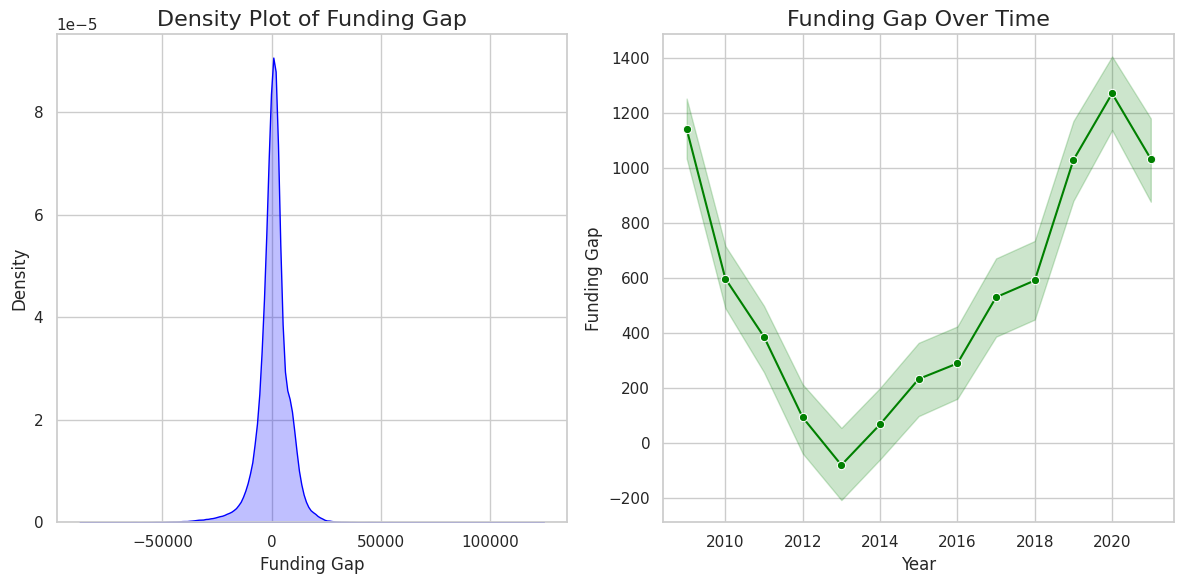

In [5]:
# Assuming 'funding_gap' and 'years' are the columns in your dataset
sns.set(style="whitegrid")  # Optional: For a cleaner plot style

# Create a figure and axis object
plt.figure(figsize=(12, 6))

# Plot the density of the funding gap
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot on the first subplot
sns.kdeplot(df['fundinggap'], shade=True, color="blue")
plt.title('Density Plot of Funding Gap', fontsize=16)
plt.xlabel('Funding Gap', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Plot funding gap over time (years)
plt.subplot(1, 2, 2)  # Plot on the second subplot
sns.lineplot(x='year', y='fundinggap', data=df, marker='o', color='green')
plt.title('Funding Gap Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Funding Gap', fontsize=12)

# Adjust layout to prevent overlapping of plots
plt.tight_layout()

# Save the figure as an image
plt.savefig('funding_gap_analysis.png', dpi=300, bbox_inches='tight')

# Optionally, display the plot
plt.show()

In [7]:
df[df['year'].isin([2012, 2013, 2014])].groupby('year')['fundinggap'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2012,12380.0,94.478675,7241.906005,-83985.0,-2534.0,530.5,3394.25,122599.0
2013,12365.0,-78.755600,7397.769287,-82691.0,-2897.0,379.0,3423.00,55348.0
2014,12322.0,68.981334,7381.654192,-82816.0,-2806.0,415.0,3522.75,55279.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='fundinggap'>

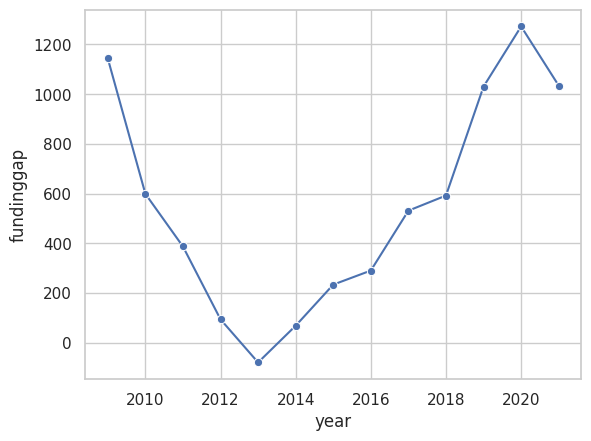

In [8]:
sns.lineplot(x='year', y='fundinggap', data=df.groupby('year')['fundinggap'].mean().reset_index(), marker='o')


<Axes: xlabel='year', ylabel='fundinggap'>

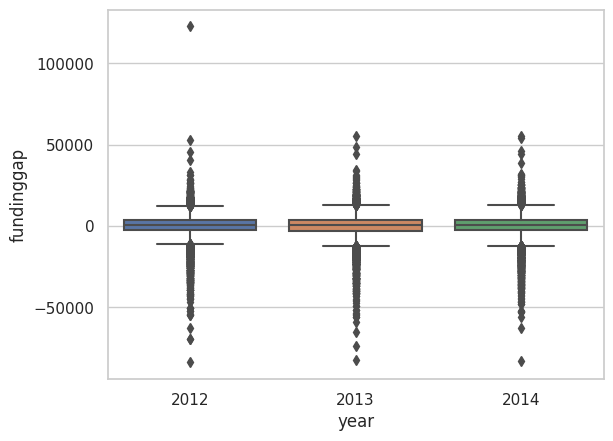

In [9]:
sns.boxplot(x='year', y='fundinggap', data=df[df['year'].isin([2012, 2013, 2014])])

In [10]:
df.groupby('year')['fundinggap'].agg(['mean', 'median']).loc[2012:2014]

,mean,median
year,,
2012,94.478675,530.5
2013,-78.755600,379.0
2014,68.981334,415.0


<Axes: xlabel='year', ylabel='fundinggap'>

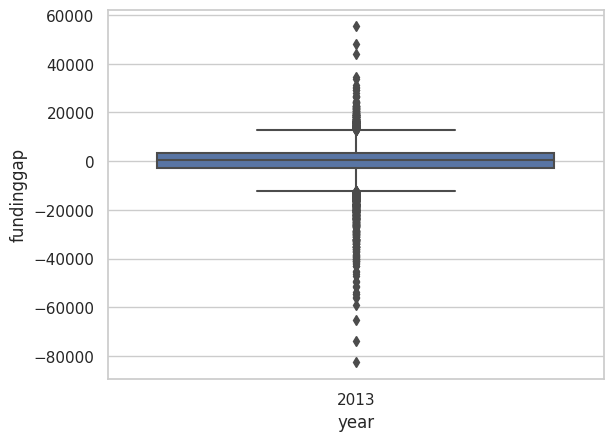

In [12]:
sns.boxplot(x='year', y='fundinggap', data=df[df['year'] == 2013])

In [13]:
df[df['year'] == 2013].sort_values('fundinggap').head(20)

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
17868,2013,643170,WOODVILLE UNION ELEMENTARY,California,CA,10391,93082,-82691,-0.962718,496,0.590291,0.022177,0.881048,0.000000,0.000000,0.000000,0.967742,0.000000,0.000000,0.032258
68859,2013,2800690,BENOIT SCHOOL DISTRICT,Mississippi,MS,12761,86649,-73888,NaN,268,0.599278,0.182836,0.000000,0.000000,0.000000,0.947761,0.026119,0.007463,0.000000,0.018657
78446,2013,3017010,LODGE GRASS ELEM,Montana,MT,27523,92713,-65190,-1.079513,174,0.417218,0.114943,0.873563,0.988506,0.000000,0.000000,0.000000,0.000000,0.000000,0.011494
69148,2013,2801360,DURANT PUBLIC SCHOOL DIST,Mississippi,MS,7526,66586,-59060,NaN,574,0.622530,0.148084,0.000000,0.000000,0.003484,0.982578,0.000000,0.000000,0.000000,0.013937
9631,2013,611760,EARLIMART ELEMENTARY,California,CA,9914,66104,-56190,-0.698996,1881,0.614252,0.029771,0.744285,0.000000,0.014354,0.002126,0.967570,0.007975,0.000532,0.007443
129199,2013,4620100,EAGLE BUTTE SCHOOL DISTRICT 20-1,South Dakota,SD,18880,74710,-55830,-0.886281,291,0.386973,0.663230,0.010309,0.903780,0.000000,0.000000,0.010309,0.000000,0.000000,0.085911
69426,2013,2802040,HUMPHREYS CO SCHOOL DIST,Mississippi,MS,8213,62840,-54627,-0.864075,1759,0.621514,0.179079,0.006822,0.000000,0.002842,0.968732,0.011370,0.005117,0.000000,0.011939
69911,2013,2800720,NORTH BOLIVAR SCHOOL DISTRICT,Mississippi,MS,10394,64819,-54425,NaN,645,0.611501,0.168992,0.009302,0.003101,0.000000,0.965892,0.017054,0.004651,0.000000,0.009302
1004,2013,102130,LINDEN CITY,Alabama,AL,9896,63718,-53822,-0.854524,519,0.561933,0.119460,0.006338,0.000000,0.001927,0.953757,0.013487,0.000000,0.000000,0.030829
70249,2013,2800780,SHAW SCHOOL DISTRICT,Mississippi,MS,11179,62870,-51691,NaN,486,0.632582,0.113169,0.000000,0.002058,0.000000,0.962963,0.002058,0.002058,0.000000,0.030864


In [14]:
df[df['year'] == 2013].sort_values('fundinggap').tail(20)

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
97876,2013,3626370,NORTH SHORE CENTRAL SCHOOL DISTRICT,New York,NY,30248,6218,24030,0.747378,2754,0.038973,0.173203,0.012346,0.003268,0.045388,0.008351,0.070080,0.013798,0.000726,0.858388
99759,2013,3627540,SOUTHAMPTON UNION FREE SCHOOL DISTRICT,New York,NY,33474,9366,24108,0.153424,1604,0.091040,0.145885,0.100374,0.089776,0.028678,0.052992,0.281795,0.000000,0.001870,0.544888
158584,2013,5602670,FREMONT COUNTY SCHOOL DISTRICT # 2,Wyoming,WY,33355,9151,24204,NaN,155,0.084577,0.116129,0.000000,0.032258,0.000000,0.000000,0.012903,0.000000,0.000000,0.954839
85631,2013,3403630,DEAL BORO SCHOOL DISTRICT,New Jersey,NJ,38392,14097,24295,NaN,149,0.304878,0.046980,0.000000,0.006711,0.020134,0.134228,0.087248,0.000000,0.000000,0.751678
96855,2013,3617700,LOCUST VALLEY CENTRAL SCHOOL DISTRICT,New York,NY,31866,7056,24810,0.619221,2171,0.057906,0.181944,0.041916,0.000461,0.033625,0.011515,0.139567,0.012437,0.000461,0.801935
96239,2013,3615270,INDIAN LAKE CENTRAL SCHOOL DISTRICT,New York,NY,36672,10454,26218,NaN,131,0.159722,0.106870,0.000000,0.000000,0.000000,0.007634,0.000000,0.007634,0.000000,0.984733
96395,2013,3615810,JERICHO UNION FREE SCHOOL DISTRICT,New York,NY,32587,6349,26238,1.014513,3052,0.054613,0.146461,0.017693,0.000000,0.392857,0.022281,0.025557,0.000983,0.000655,0.557667
97419,2013,3619710,MONTAUK UNION FREE SCHOOL DISTRICT,New York,NY,35451,8877,26574,0.524994,344,0.133858,0.136628,0.061046,0.000000,0.061046,0.026163,0.287791,0.008721,0.000000,0.616279
95610,2013,3612960,GREENWOOD LAKE UNION FREE SCHOOL DISTRICT,New York,NY,34951,8143,26808,0.247485,529,0.096844,0.189036,0.001890,0.001890,0.015123,0.011342,0.181475,0.020794,0.000000,0.769376
96291,2013,3615480,ISLAND PARK UNION FREE SCHOOL DISTRICT,New York,NY,34895,6931,27964,0.268737,730,0.080986,0.134247,0.054795,0.005479,0.028767,0.019178,0.263014,0.004110,0.001370,0.678082


In [15]:
df[df['year'] == 2012].sort_values('fundinggap').head(20)

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
17867,2012,643170,WOODVILLE UNION ELEMENTARY,California,CA,10448,94433,-83985,-0.927545,493,0.632296,0.030426,0.845842,0.000000,0.002041,0.000000,0.946939,0.000000,0.000000,0.051020
79519,2012,3028800,WYOLA ELEM,Montana,MT,18465,87939,-69474,NaN,101,0.285714,0.168317,0.940594,0.970297,0.000000,0.000000,0.000000,0.000000,0.000000,0.029703
9630,2012,611760,EARLIMART ELEMENTARY,California,CA,10322,79741,-69419,-0.689267,1865,0.722989,0.024665,0.739946,0.000000,0.016622,0.002681,0.966756,0.005362,0.000536,0.008043
60842,2012,2618330,HIGHLAND PARK CITY SCHOOLS,Michigan,MI,16896,79961,-63065,-0.924152,977,0.604951,0.199591,0.000000,0.000000,0.002073,0.995855,0.001036,0.000000,0.000000,0.001036
78445,2012,3017010,LODGE GRASS ELEM,Montana,MT,21924,77033,-55109,-1.297727,198,0.412752,0.045455,0.904040,0.994950,0.000000,0.000000,0.000000,0.000000,0.000000,0.005051
12804,2012,600022,MENDOTA UNIFIED,California,CA,8476,63496,-55020,-0.554078,2873,0.570370,0.034807,0.793596,0.000696,0.000000,0.000000,0.877828,0.121476,0.000000,0.000000
28009,2012,1723640,BROOKLYN UD 188,Illinois,IL,15431,69435,-54004,NaN,174,0.724138,0.022988,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
68858,2012,2800690,BENOIT SCHOOL DISTRICT,Mississippi,MS,13003,65477,-52474,NaN,287,0.520000,0.160279,0.000000,0.000000,0.000000,0.944251,0.024390,0.003484,0.000000,0.027875
62354,2012,2624870,MUSKEGON HEIGHTS SCHOOL DISTRICT,Michigan,MI,12294,64660,-52366,-1.054963,1514,0.644771,0.173712,0.000000,0.003706,0.000000,0.936249,0.028169,0.004448,0.000000,0.027428
16827,2012,639060,TERRA BELLA UNION ELEMENTARY,California,CA,9601,60410,-50809,-0.750474,898,0.593496,0.061247,0.663697,0.001114,0.007795,0.007795,0.963252,0.000000,0.000000,0.020044


Text(2011.5, 98079.20000000001, 'Dip in 2013')

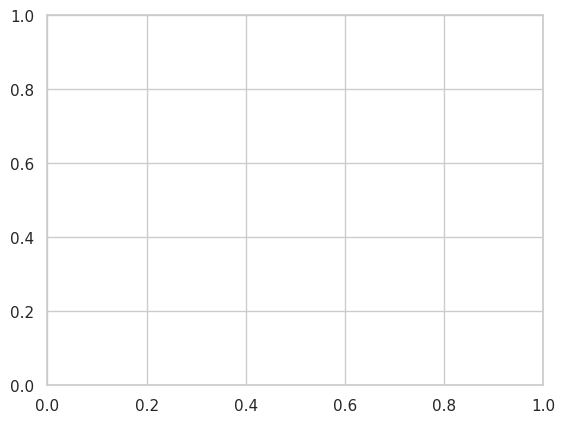

In [11]:
plt.annotate('Dip in 2013', xy=(2013, df[df['year'] == 2013]['fundinggap'].mean()), 
             xytext=(2011.5, df['fundinggap'].max()*0.8),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

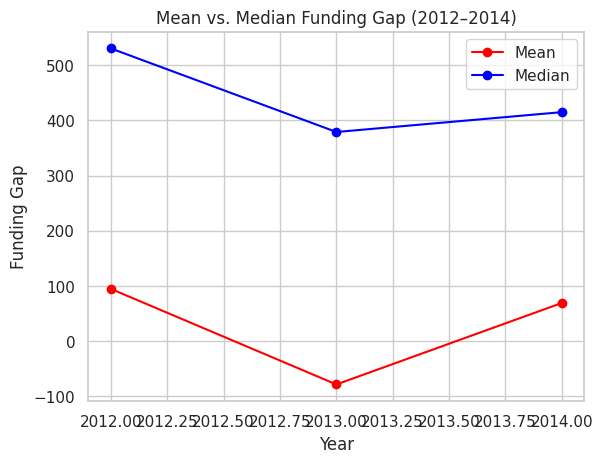

In [17]:
agg = df.groupby('year')['fundinggap'].agg(['mean', 'median']).reset_index()
agg = agg[agg['year'].between(2012, 2014)]

plt.plot(agg['year'], agg['mean'], marker='o', label='Mean', color='red')
plt.plot(agg['year'], agg['median'], marker='o', label='Median', color='blue')
plt.title('Mean vs. Median Funding Gap (2012–2014)')
plt.xlabel('Year')
plt.ylabel('Funding Gap')
plt.legend()
plt.savefig('Mean_Median_funding_gap_2012_2014.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
df[df['year'] == 2013].sort_values('fundinggap').head(10)

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
17868,2013,643170,WOODVILLE UNION ELEMENTARY,California,CA,10391,93082,-82691,-0.962718,496,0.590291,0.022177,0.881048,0.000000,0.000000,0.000000,0.967742,0.000000,0.000000,0.032258
68859,2013,2800690,BENOIT SCHOOL DISTRICT,Mississippi,MS,12761,86649,-73888,NaN,268,0.599278,0.182836,0.000000,0.000000,0.000000,0.947761,0.026119,0.007463,0.000000,0.018657
78446,2013,3017010,LODGE GRASS ELEM,Montana,MT,27523,92713,-65190,-1.079513,174,0.417218,0.114943,0.873563,0.988506,0.000000,0.000000,0.000000,0.000000,0.000000,0.011494
69148,2013,2801360,DURANT PUBLIC SCHOOL DIST,Mississippi,MS,7526,66586,-59060,NaN,574,0.622530,0.148084,0.000000,0.000000,0.003484,0.982578,0.000000,0.000000,0.000000,0.013937
9631,2013,611760,EARLIMART ELEMENTARY,California,CA,9914,66104,-56190,-0.698996,1881,0.614252,0.029771,0.744285,0.000000,0.014354,0.002126,0.967570,0.007975,0.000532,0.007443
129199,2013,4620100,EAGLE BUTTE SCHOOL DISTRICT 20-1,South Dakota,SD,18880,74710,-55830,-0.886281,291,0.386973,0.663230,0.010309,0.903780,0.000000,0.000000,0.010309,0.000000,0.000000,0.085911
69426,2013,2802040,HUMPHREYS CO SCHOOL DIST,Mississippi,MS,8213,62840,-54627,-0.864075,1759,0.621514,0.179079,0.006822,0.000000,0.002842,0.968732,0.011370,0.005117,0.000000,0.011939
69911,2013,2800720,NORTH BOLIVAR SCHOOL DISTRICT,Mississippi,MS,10394,64819,-54425,NaN,645,0.611501,0.168992,0.009302,0.003101,0.000000,0.965892,0.017054,0.004651,0.000000,0.009302
1004,2013,102130,LINDEN CITY,Alabama,AL,9896,63718,-53822,-0.854524,519,0.561933,0.119460,0.006338,0.000000,0.001927,0.953757,0.013487,0.000000,0.000000,0.030829
70249,2013,2800780,SHAW SCHOOL DISTRICT,Mississippi,MS,11179,62870,-51691,NaN,486,0.632582,0.113169,0.000000,0.002058,0.000000,0.962963,0.002058,0.002058,0.000000,0.030864


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '2013 Funding Gap Distribution')

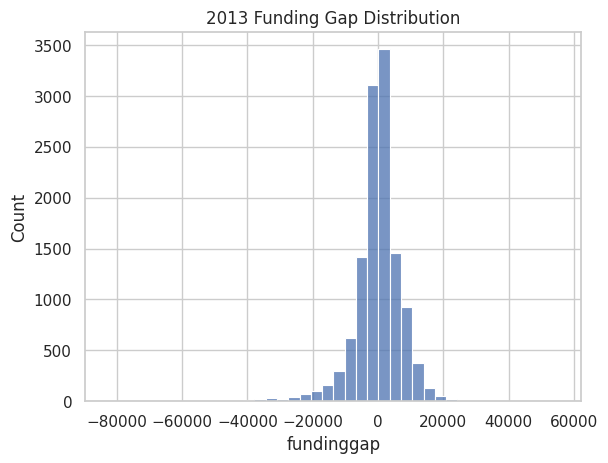

In [19]:
sns.histplot(df[df['year'] == 2013]['fundinggap'], bins=40)
plt.title("2013 Funding Gap Distribution")

In [20]:
df[df['year'] == 2012].sort_values('fundinggap', ascending=False).head(10)

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
14606,2012,631170,PLUMAS UNIFIED,California,CA,130849,8250,122599,-0.115995,186,0.210941,0.983871,0.000000,0.053763,0.005376,0.016129,0.150538,0.000000,0.005376,0.768817
98572,2012,3623340,POCANTICO HILLS CENTRAL SCHOOL DISTRICT,New York,NY,61029,8075,52954,0.371559,306,0.056974,0.160131,0.016340,0.006536,0.160131,0.140523,0.120915,0.000000,0.000000,0.571895
93310,2012,3605370,BRIDGEHAMPTON UNION FREE SCHOOL DISTRICT,New York,NY,62201,16607,45594,NaN,159,0.065868,0.188679,0.106918,0.012579,0.006289,0.283019,0.327044,0.031447,0.012579,0.327044
92692,2012,3602880,AMAGANSETT UNION FREE SCHOOL DISTRICT,New York,NY,47344,7142,40202,NaN,122,0.011236,0.122951,0.040984,0.000000,0.016393,0.008197,0.122951,0.114754,0.000000,0.737705
98754,2012,3624060,QUOGUE UNION FREE SCHOOL DISTRICT,New York,NY,39615,6543,33072,NaN,122,0.065790,0.065574,0.000000,0.000000,0.024590,0.040984,0.040984,0.000000,0.000000,0.893443
98831,2012,3624420,REMSENBURG-SPEONK UNION FREE SCHOOL DISTRICT,New York,NY,39787,8292,31495,0.567777,188,0.017751,0.164894,0.037234,0.000000,0.021277,0.031915,0.101064,0.000000,0.000000,0.845745
127449,2012,4400690,NEW SHOREHAM,Rhode Island,RI,38614,7363,31251,NaN,114,0.141667,0.000000,0.043860,0.000000,0.000000,0.000000,0.052632,0.017544,0.000000,0.929825
97418,2012,3619710,MONTAUK UNION FREE SCHOOL DISTRICT,New York,NY,36576,7795,28781,0.566154,323,0.077320,0.133127,0.077399,0.000000,0.049536,0.034056,0.294118,0.003096,0.000000,0.619195
96290,2012,3615480,ISLAND PARK UNION FREE SCHOOL DISTRICT,New York,NY,35416,6960,28456,0.331080,704,0.094488,0.140625,0.046875,0.005682,0.024148,0.021307,0.284091,0.004261,0.000000,0.660511
99473,2012,3626640,SHELTER ISLAND UNION FREE SCHOOL DISTRICT,New York,NY,36913,9015,27898,0.278485,242,0.019544,0.140496,0.028926,0.000000,0.004132,0.020661,0.061983,0.053719,0.000000,0.859504


In [21]:
df[df['year'] == 2013].sort_values('fundinggap', ascending=False).head(10)

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
98573,2013,3623340,POCANTICO HILLS CENTRAL SCHOOL DISTRICT,New York,NY,63592,8244,55348,0.453519,304,0.055010,0.164474,0.016447,0.009868,0.171053,0.121710,0.154605,0.003289,0.000000,0.539474
92693,2013,3602880,AMAGANSETT UNION FREE SCHOOL DISTRICT,New York,NY,55339,7091,48248,NaN,115,0.028571,0.121739,0.000000,0.000000,0.017391,0.008696,0.156522,0.078261,0.000000,0.739130
93311,2013,3605370,BRIDGEHAMPTON UNION FREE SCHOOL DISTRICT,New York,NY,66079,22176,43903,NaN,151,0.073171,0.278146,0.105960,0.006622,0.000000,0.284768,0.397351,0.039735,0.006622,0.264901
98755,2013,3624060,QUOGUE UNION FREE SCHOOL DISTRICT,New York,NY,40077,5674,34403,NaN,117,0.013423,0.051282,0.000000,0.000000,0.025641,0.025641,0.034188,0.000000,0.000000,0.914530
98832,2013,3624420,REMSENBURG-SPEONK UNION FREE SCHOOL DISTRICT,New York,NY,42526,8667,33859,0.518763,171,0.018072,0.169591,0.040936,0.000000,0.023392,0.023392,0.099415,0.000000,0.000000,0.853801
97727,2013,3620730,NEWCOMB CENTRAL SCHOOL DISTRICT,New York,NY,39557,8426,31131,NaN,106,0.109091,0.066038,0.000000,0.000000,0.066038,0.009434,0.056604,0.009434,0.000000,0.858491
99474,2013,3626640,SHELTER ISLAND UNION FREE SCHOOL DISTRICT,New York,NY,40164,9502,30662,0.152293,232,0.016556,0.142241,0.034483,0.000000,0.000000,0.025862,0.081897,0.034483,0.000000,0.857759
56856,2013,2509840,PROVINCETOWN,Massachusetts,MA,44421,14267,30154,NaN,107,0.214815,0.168224,0.046729,0.000000,0.009346,0.121495,0.158879,0.102804,0.000000,0.607477
127450,2013,4400690,NEW SHOREHAM,Rhode Island,RI,40866,11625,29241,NaN,112,0.161017,0.142857,0.035714,0.000000,0.000000,0.000000,0.063063,0.027027,0.009009,0.900901
93233,2013,3605010,BOLTON CENTRAL SCHOOL DISTRICT,New York,NY,37194,8146,29048,NaN,196,0.078189,0.066326,0.000000,0.000000,0.020408,0.030612,0.005102,0.000000,0.000000,0.943878


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x792f53d9beb0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

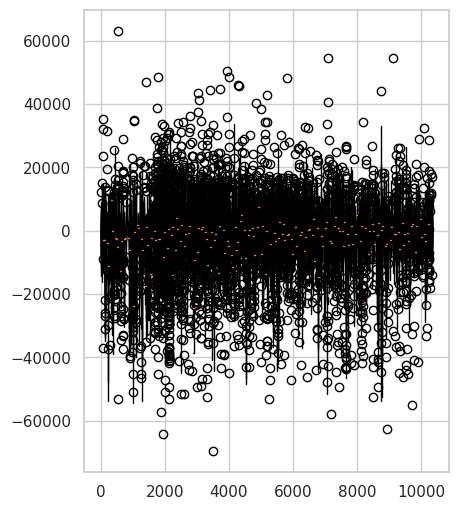

In [22]:
import matplotlib.pyplot as plt
demographic_features = ['iep', 'pov', 'ell']

# Create a figure for subplots
plt.figure(figsize=(16, 6))

# Loop through demographic features and create a box plot for each
for i, feature in enumerate(demographic_features):
    plt.subplot(1, len(demographic_features), i+1)  # 1 row, len(demographic_features) columns
    
    # Grouping data for boxplot
    box_data = [df[df[feature] == category]['fundinggap'] for category in df[feature].unique()]
    
    # Creating boxplot
    plt.boxplot(box_data)
    
    # Setting x-ticks to categories of the feature
    plt.xticks(range(1, len(df[feature].unique()) + 1), df[feature].unique(), rotation=45)
    plt.title(f'Funding Gap by {feature.capitalize()}')

plt.tight_layout()
plt.show()

In [ ]:
demographic_features = ['iep', 'pov', 'ell']  # Replace with your features

# Create a figure for subplots
plt.figure(figsize=(16, 6))

# Loop through demographic features and create a box plot for each
for i, feature in enumerate(demographic_features):
    plt.subplot(1, len(demographic_features), i+1)  # 1 row, len(demographic_features) columns
    sns.boxplot(x=feature, y='fundinggap', data=df)
    plt.title(f'Funding Gap by {feature.capitalize()}')

plt.tight_layout()
plt.show()

In [ ]:
# Plot histogram to inspect the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['outcomegap'], kde=True)  # kde=True adds a kernel density estimate (smooth curve)
plt.title('Distribution of Outcome Gap')
plt.xlabel('Gap Measure')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot histogram to inspect the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['multi'], kde=True)  # kde=True adds a kernel density estimate (smooth curve)
plt.title('Distribution of Multi race')
plt.xlabel('% of Multirace students')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot histogram to inspect the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['pac'], kde=True)  # kde=True adds a kernel density estimate (smooth curve)
plt.title('Distribution of Pac students')
plt.xlabel('% of Pac students')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot histogram to inspect the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['iep'], kde=True)  # kde=True adds a kernel density estimate (smooth curve)
plt.title('Distribution of iep students')
plt.xlabel('% of iep students')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot histogram to inspect the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ell'], kde=True)  # kde=True adds a kernel density estimate (smooth curve)
plt.title('Distribution of ell students')
plt.xlabel('% of ell students')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Impute with the mean for numerical variables
df[['outcomegap', 'iep']] = df[['outcomegap', 'iep']].apply(lambda x: x.fillna(x.mean()))

In [24]:
# Impute with the mode for numerical variables
df[['multi', 'pac', 'ell']] = df[['multi', 'pac', 'ell']].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
# Create individual scatter plots for funding gap vs. demographic features
demographic_columns = ['iep', 'pov', 'ell', 'black']  

# Set up the plotting area
fig, axes = plt.subplots(len(demographic_columns), 1, figsize=(8, 12))
fig.tight_layout(pad=5.0)

# Loop through each demographic column to create scatter plots
for i, col in enumerate(demographic_columns):
    sns.scatterplot(x=df[col], y=df['fundinggap'], ax=axes[i])
    axes[i].set_title(f'Funding Gap vs. {col.replace("_", " ").title()}')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Funding Gap')

# Save the figure as an image (e.g., PNG format)
plt.savefig('plot_image.png')  # Save as PNG image

plt.show()


In [ ]:
# List of demographic features you want to compare against funding gap
demographic_features = ['iep', 'ell', 'pov', 'black', 'hisp', 'white']  

# Create a pair plot to visualize relationships between funding_gap and demographic features
sns.pairplot(df[['fundinggap'] + demographic_features])

# Save the plot
plt.savefig('funding_gap_vs_demographics_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# List of demographic features to visualize
demographic_features = ['iep', 'ell', 'pov', 'black', 'hisp', 'white']  

# Create a figure for subplots
plt.figure(figsize=(16, 6))

# Loop through demographic features and create a box plot for each
for i, feature in enumerate(demographic_features):
    plt.subplot(1, len(demographic_features), i+1)  # 1 row, len(demographic_features) columns
    sns.boxplot(x=feature, y='fundinggap', data=df)
    plt.title(f'Funding Gap by {feature.capitalize()}')

plt.tight_layout()
# Optionally, save the plot
plt.savefig('funding_gap_vs_demographics_box.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
print(df.isnull().sum())

year          0
leaid         0
district      0
state_name    0
stabbr        0
ppcstot       0
predcost      0
fundinggap    0
outcomegap    0
enroll        0
pov           0
iep           0
ell           0
amind         0
asian         0
black         0
hisp          0
multi         0
pac           0
white         0
dtype: int64


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define features and target variable
features = [
    'enroll', 'pov', 'iep','ell', 'amind','asian', 'black', 'hisp','multi', 'pac','white'
]

# The target variable is 'Gap between actual and required spending per-pupil'
target = 'fundinggap'

X = df[features]  # Features
y = df[target]  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Training the Model 
# Initialize the RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance

from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")

print(f"R-squared: {r2}")

In [ ]:
from math import sqrt
rmse = sqrt(mse)
print(f"RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Funding Gap')
plt.ylabel('Predicted Funding Gap')
plt.title('Actual vs. Predicted Funding Gaps')
plt.grid(True)

# Save the figure
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')  # Save as PNG

plt.show()

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Funding Gap')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

# Save the figure
plt.savefig('residuals_plot.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.savefig('Residual_Distribution.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [ ]:
importances = rf_model.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(len(importances))]
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importances from Random Forest')

# Save the figure
plt.savefig('Feature_Importance.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()


In [ ]:
# Get feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame to visualize importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

In [ ]:
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Now, scale the test data using the same scaler (important to use the same scaler)
X_test_scaled = scaler.transform(X_test)

# Make predictions using the trained model on the scaled test data
predictions = rf_model.predict(X_test_scaled)

# Output predictions
print("Predictions on Test Data:", predictions)

# Optionally, evaluate the model's performance on the test data
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy on Test Data:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlations between numerical columns
correlation_matrix = numerical_df.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")

# Save the heatmap to a file in the /kaggle/working/ directory
plt.savefig('/kaggle/working/correlation_heatmap.png')  # Save the heatmap as an image
plt.close()  # Close the plot to avoid displaying it twice

# Optionally, display the heatmap (it will be saved already)
plt.show()


In [ ]:
# Plot actual spending per pupil, required spending per pupil, and the gap over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='ppcstot', label='Actual Spending')
sns.lineplot(data=df, x='year', y='fundinggap', label='Funding gap')
plt.title('Trends in Actual, Required Spending, and Spending Gap (2009-2021)')
plt.xlabel('Year')
plt.ylabel('Spending per Pupil')
plt.legend()
# Save the plot to a file in the /kaggle/working/ directory
plt.savefig('/kaggle/working/spending_gap_trends.png')  # Save the plot as an image
plt.show()

In [ ]:
# Plot demographic breakdown (e.g., percentage of Black, Hispanic students)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='black', label='Black Students')
sns.lineplot(data=df, x='year', y='hisp', label='Hispanic Students')
sns.lineplot(data=df, x='year', y='white', label='White Students')
sns.lineplot(data=df, x='year', y='pov', label='Students in poverty')
plt.title('Demographic Changes Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Students')
plt.legend()
plt.show()

In [ ]:
# Plot boxplot for percent special education students over the years
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='iep')
plt.title('Distribution of Special Education Students Over Time')
plt.xlabel('Year')
plt.ylabel('Percent of Special Education Students')
plt.show()

# Plot boxplot for percent ELL students over the years
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='ell')
plt.title('Distribution of ELL Students Over Time')
plt.xlabel('Year')
plt.ylabel('Percent of ELL Students')
plt.show()

# Plot boxplot for child poverty rate over the years
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='pov')
plt.title('Distribution of Child Poverty Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Child Poverty Rate')
plt.show()


In [ ]:
# Plot total student enrollment over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='enroll', color='purple')
plt.title('Total Student Enrollment Over Time')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.show()

In [ ]:
# Select a subset of columns to visualize relationships
subset_df = df[['year', 'fundinggap','iep','pov','ell','black','hisp']]

# Pairplot
sns.pairplot(subset_df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()


In [ ]:
# This code creates a function that produces a new column to identify the racial majority of a School District

def majority_minority(row):

  """

  This function will check which racial grouping, White/Asian or Black/Hispanic/American Indian, 

  comprises over 50% of the student population

  """

  # Combine percentages for White/Asian and URM groups

  white_asian_percentage = row['white'] + row['asian']

  minority_percentage = row['black'] + row['hisp'] + row['amind']+ row['multi']+ row['pac']

  

  if white_asian_percentage > 0.50:

      return "White/Asian Majority"

  elif minority_percentage > 0.50:

      return "URM Majority"

  else:

      return "Mixed"

 

# Run the function to create the new column

df['Majority_Group'] = df.apply(majority_minority, axis=1)
print(df.head())

In [27]:
state_to_region = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Create a new column for regions
df['Region'] = df['state_name'].map(state_to_region)

# Display the updated DataFrame
print(df)

        year    leaid                          district state_name stabbr  \
0       2009   100005                  ALBERTVILLE CITY    Alabama     AL   
1       2010   100005                  ALBERTVILLE CITY    Alabama     AL   
2       2011   100005                  ALBERTVILLE CITY    Alabama     AL   
3       2012   100005                  ALBERTVILLE CITY    Alabama     AL   
4       2013   100005                  ALBERTVILLE CITY    Alabama     AL   
...      ...      ...                               ...        ...    ...   
159029  2017  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159030  2018  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159031  2019  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159032  2020  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159033  2021  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   

        ppcstot  predcost  fundinggap  outcomegap  enroll  ...       iep  \

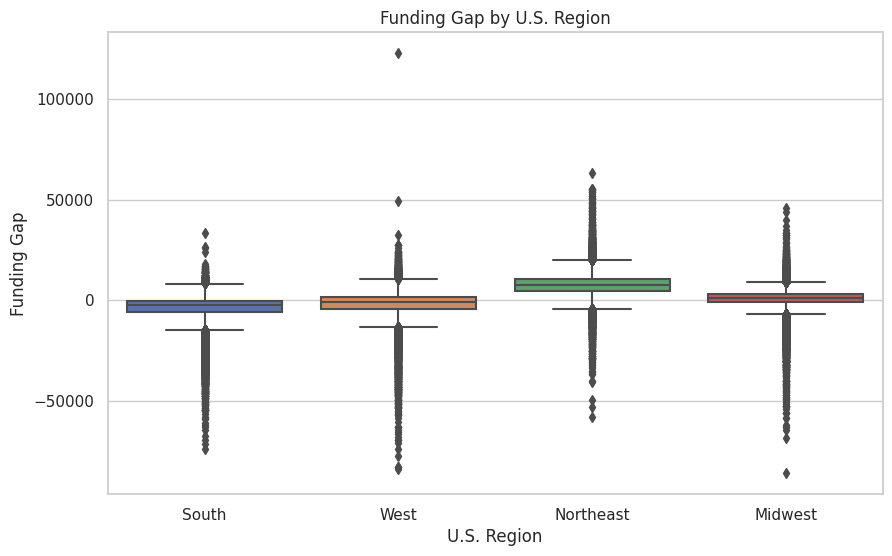

In [28]:
# Create a box plot to show funding gap by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='fundinggap', data=df)

# Customize the plot
plt.title('Funding Gap by U.S. Region')
plt.xlabel('U.S. Region')
plt.ylabel('Funding Gap')

# Save the figure as an image (e.g., PNG format)
plt.savefig('plot_image.png')  # Save as PNG image

# Show the plot
plt.show()

In [29]:
region_summary = df.groupby('Region')['fundinggap'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).round(2)
print(region_summary)

           count     mean  median    min     max      std
Region                                                   
Midwest    59031   725.55  1328.0 -85859   45914  4846.21
Northeast  33668  7853.08  7787.5 -57732   63147  6042.61
South      38967 -4160.10 -2475.0 -73888   33571  6858.22
West       27355 -2101.57  -812.0 -83985  122599  7366.98


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a variable to filter the dataset by any year of interest
df_year = df[df['year'] == 2009]                    # Just like in section 1.3.1, you can use Boleans and comparison opperators to filter

# We specify a size for our figure, and then construct a boxplot. Here we are looking at the
plt.figure(figsize=(10, 15))                        # You can change the size
sns.boxplot(data=df_year, x="fundinggap", y="stabbr")     # You can change the values of x and/or y for variables that interest you

# Label our axes and title
plt.xlabel("District funding gap levels")
plt.ylabel("State")
plt.title("Funding gap levels by State")


#Print the plot
plt.show()

In [ ]:
# Aggregate funding data by State and Year (e.g., taking the mean)
agg_df = df.groupby(['state_name', 'year'], as_index=False)['ppcstot'].mean()

# Pivot the aggregated DataFrame for heatmap
pivot_df = agg_df.pivot(index='state_name', columns='year', values='ppcstot')

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".0f", cbar_kws={'label': 'Funding Levels'})
plt.title('Funding Levels by State and Year')
plt.xlabel('Year')
plt.ylabel('State')

plt.savefig('/kaggle/working/Fundingbystate.png')  # Save the heatmap as an image
plt.close()  # Close the plot to avoid displaying it twice
plt.show()

In [ ]:
# Aggregate funding gaps by State and Year (e.g., taking the mean)
agg_df = df.groupby(['state_name', 'year'], as_index=False)['fundinggap'].mean()

# Pivot the aggregated DataFrame for heatmap
pivot_df = agg_df.pivot(index='state_name', columns='year', values='fundinggap')

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".0f", cbar_kws={'label': 'Funding Gaps'})
plt.title('Funding Gaps by State and Year')
plt.xlabel('Year')
plt.ylabel('State')

# Step 4: Save the figure as a PDF
plt.savefig('visualization.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
# play with this to redo the colors

import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate funding gaps by State and Year (e.g., taking the mean)
agg_df = df.groupby(['state_name', 'year'], as_index=False)['fundinggap'].mean()

# Pivot the aggregated DataFrame for heatmap
pivot_df = agg_df.pivot(index='state_name', columns='year', values='fundinggap')

# Create a diverging color palette from skyblue to red
cmap = sns.diverging_palette(200, 20, s=75, l=50, as_cmap=True)

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".0f", cbar_kws={'label': 'Funding Gaps'})
plt.title('Funding Gaps by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define features and target variable
features = [
    'enroll', 'pov', 'iep','ell', 'amind','asian', 'black', 'hisp','multi', 'pac','white'
]

# The target variable is 'Gap between actual and required spending per-pupil'
target = 'fundinggap'

X = df[features]  # Features
y = df[target]  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Training the Model 
# Initialize and train a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model's performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Model - Mean Squared Error: {mse_dt}')
print(f'Decision Tree Model - R-squared: {r2_dt}')

In [ ]:
#Option 2: Random Forest
# Initialize and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Model - Mean Squared Error: {mse_rf}')
print(f'Random Forest Model - R-squared: {r2_rf}')


In [ ]:
# Making predictions on new data 
# Replace 'new_data' with new data for prediction
new_data_scaled = scaler.transform(new_data)
predictions = rf_model.predict(new_data_scaled) 


In [37]:
#Redo Cluster Analysis starting here
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [40]:
features = ['fundinggap', 'pov', 'iep', 'ell', 'amind', 'hisp','asian', 'black', 'hisp', 'white']
X = df[features].dropna()  # Drop missing values if any

original_index = X.index

# Standardize features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose number of clusters 
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to original dataframe
df.loc[original_index, 'cluster'] = clusters

In [43]:
from sklearn.cluster import KMeans

In [44]:
# Add cluster labels back to original dataframe
df.loc[original_index, 'cluster'] = clusters

# Summary of clusters - means of each feature by cluster
cluster_summary = df.groupby('cluster')[features].mean().round(2)

print(cluster_summary)

         fundinggap   pov   iep   ell  amind  hisp  asian  black  hisp  white
cluster                                                                      
0.0        -4544.86  0.27  0.18  0.05   0.54  0.05   0.00   0.02  0.05   0.35
1.0        -4755.54  0.23  0.12  0.20   0.01  0.58   0.04   0.06  0.58   0.29
2.0         2770.16  0.15  0.15  0.02   0.01  0.07   0.02   0.03  0.07   0.84
3.0       -10706.82  0.31  0.14  0.04   0.00  0.09   0.01   0.55  0.09   0.32


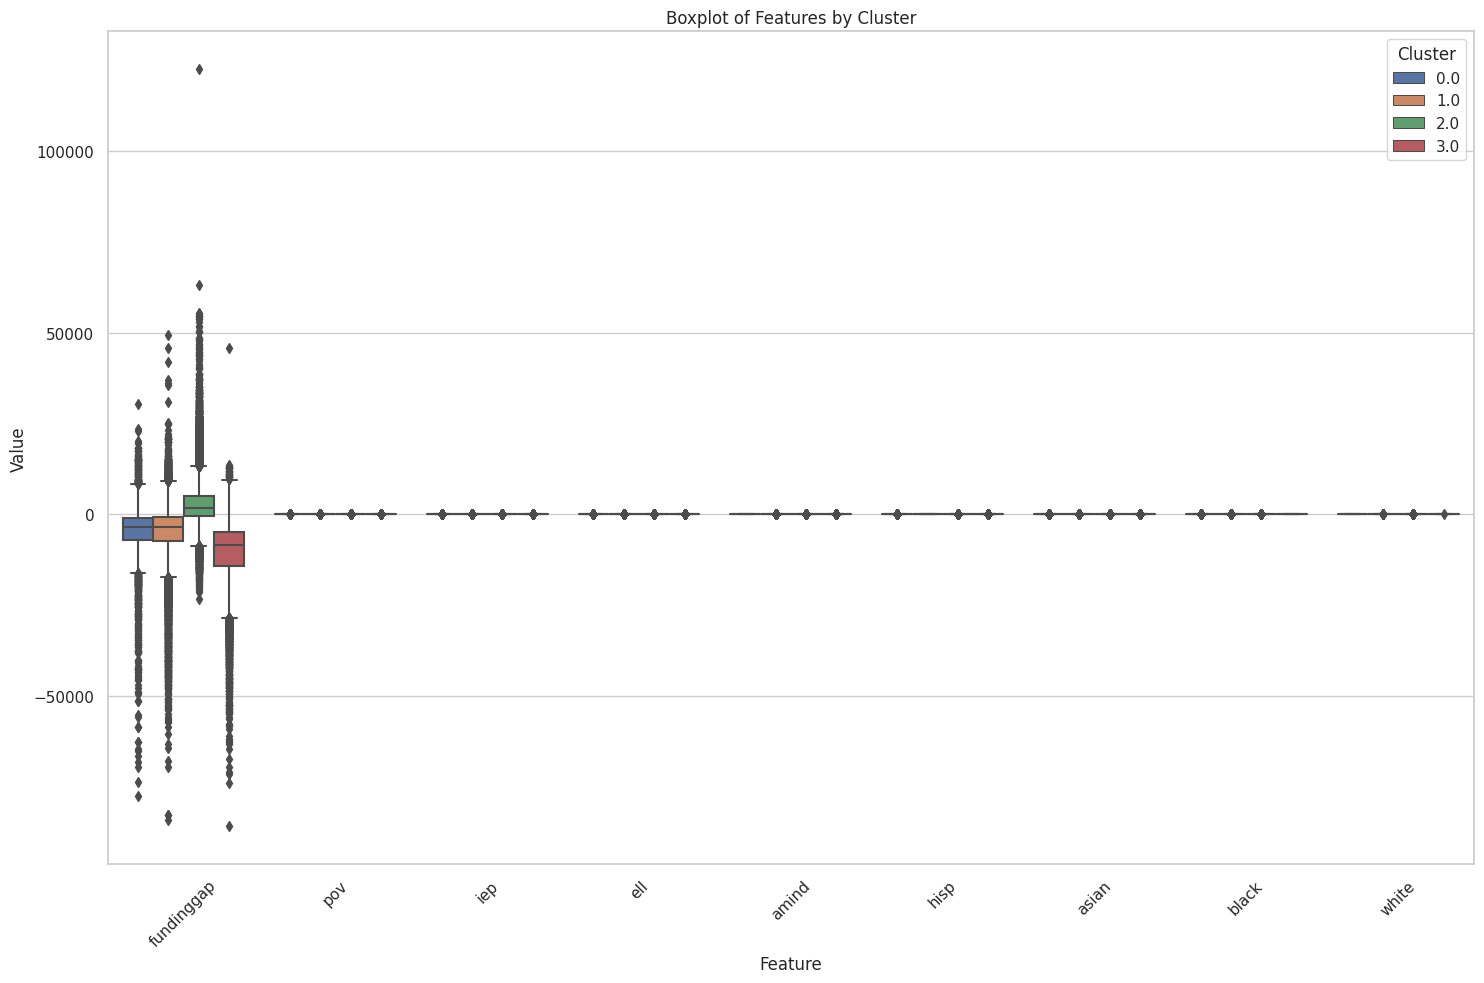

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot size and style
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Melt the dataframe to long format for easier plotting
melted_df = df.melt(id_vars='cluster', value_vars=features, var_name='Feature', value_name='Value')

# Create a box plot grouped by cluster for each feature
sns.boxplot(x='Feature', y='Value', hue='cluster', data=melted_df)

plt.title('Boxplot of Features by Cluster')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

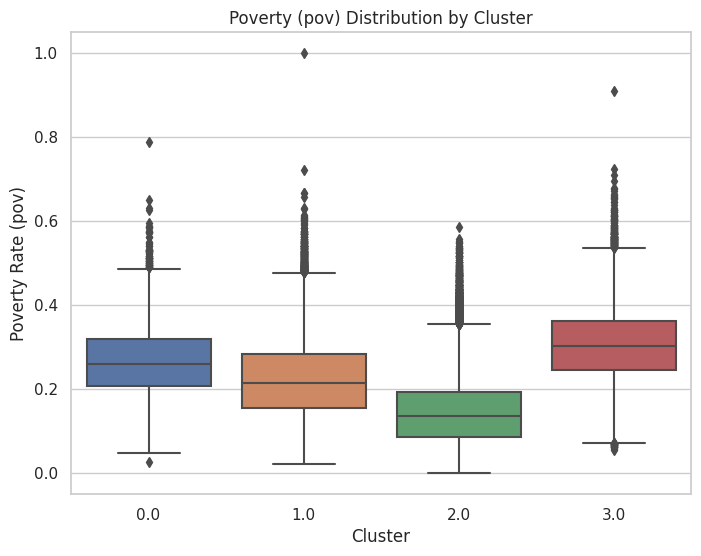

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='pov', data=df)

plt.title('Poverty (pov) Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Poverty Rate (pov)')
plt.show()

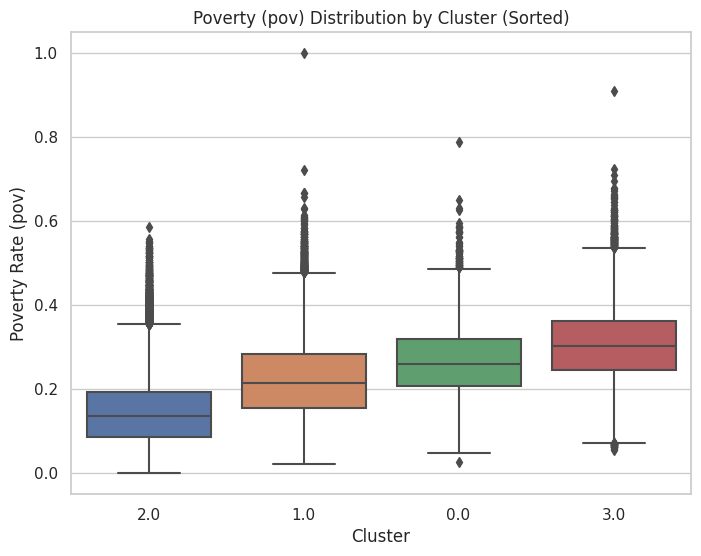

In [49]:
# Calculate median poverty by cluster
cluster_order = df.groupby('cluster')['pov'].median().sort_values().index

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='pov', data=df, order=cluster_order)

plt.title('Poverty (pov) Distribution by Cluster (Sorted)')
plt.xlabel('Cluster')
plt.ylabel('Poverty Rate (pov)')
plt.savefig('plot_image.png')  # Save as PNG image
plt.show()

In [48]:
# Summary statistics for 'pov' by cluster
pov_summary = df.groupby('cluster')['pov'].describe()
print(pov_summary)

            count      mean       std       min       25%       50%       75%  \
cluster                                                                         
0.0        4644.0  0.268115  0.087851  0.026549  0.207152  0.259529  0.320177   
1.0       21982.0  0.226192  0.095422  0.021978  0.155083  0.214679  0.284329   
2.0      121014.0  0.146245  0.077018  0.000000  0.086775  0.136051  0.194439   
3.0       11394.0  0.306933  0.092539  0.055667  0.246052  0.304099  0.362560   

              max  
cluster            
0.0      0.787879  
1.0      1.000000  
2.0      0.585294  
3.0      0.910714  


In [ ]:
# Save the heatmap as a PDF file
plt.savefig('funding_gaps_heatmap.pdf')  # Save as PDF
plt.close()  # Close the plot to avoid displaying it again

# Move the PDF file to the output directory for downloading
shutil.move('funding_gaps_heatmap.pdf', '/kaggle/working/funding_gaps_heatmap.pdf')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a variable to filter the dataset by any year of interest
df_year = df[df['year'] == 2021]                    # Just like in section 1.3.1, you can use Boleans and comparison opperators to filter

# We specify a size for our figure, and then construct a boxplot. Here we are looking at the
plt.figure(figsize=(10, 15))                        # You can change the size
sns.boxplot(data=df_year, x="fundinggap", y="stabbr")     # You can change the values of x and/or y for variables that interest you

# Label our axes and title
plt.xlabel("District funding gap levels")
plt.ylabel("State")
plt.title("Funding gap levels by State")


#Print the plot
plt.show()

In [ ]:
# Filter the dataframe for year 2021
df_hplot = df[df['year'] == 2021]  # This creates a filtered dataframe

# Create histograms for all numerical columns
df_hplot.hist(figsize=(12, 12), bins=20)

# Add title
plt.suptitle('Distribution of Numerical Variables', fontsize=16)

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df['RegionCode'] = label_encoder.fit_transform(df['Region'])
print(df.head())

In [ ]:
df['Race_Ethn'] = label_encoder.fit_transform(df['Majority_Group'])
print(df.head())

In [ ]:
# Create a count plot for ethnicity over time using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', hue='Race_Ethn', palette='viridis')
plt.title('Distribution of Ethnicity Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(title='Ethnicity')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
# Add Region as a facet
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df, col='Region', col_wrap=2, height=4, aspect=1.5)
g.map_dataframe(sns.countplot, x='year', hue='Race_Ethn', palette='viridis', dodge=True)
g.add_legend(title='Ethnicity')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Count")

# Adjust layout for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#We begin by importing plotly.express as px
import plotly.express as px

#Ask Abi about this idea
# Create an interactive scatter plot
fig = px.scatter(df,
                 x="ppcstot",
                 y="RegionCode",
                 size="enroll",
                 size_max=70,
                 color="year",                  # Both the color and size of the bubblues will reference the total enrollment of each district
                 hover_name="Region")


# Customize and show the plot
fig.update_layout(title='Interactive Plot')
fig.show()

In [ ]:
# Calculate mean funding level by state and year
mean_funding = df.groupby(['state_name', 'year'])['ppcstot'].mean().reset_index()

# Formatting the output nicely
mean_funding['ppcstot'] = mean_funding['ppcstot'].map('${:,.2f}'.format)  # Formatting as currency

# Display the results
print(mean_funding)


In [ ]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Check for normality using Shapiro-Wilk test
print("\nShapiro-Wilk Test Results:")
for year in df['year'].unique():
    stat, p_value = stats.shapiro(df[df['year'] == year]['ppcstot'])
    print(f"{year}: Statistic={stat:.3f}, p-value={p_value:.3f}")

# 2. Check for homogeneity of variances using Levene's test
print("\nLevene's Test Results:")
stat, p_value = stats.levene(
    df[df['year'] == '2009']['ppcstot'],
    df[df['year'] == '2010']['ppcstot'],
    df[df['year'] == '2011']['ppcstot'],
    df[df['year'] == '2012']['ppcstot'],
    df[df['year'] == '2013']['ppcstot'],
    df[df['year'] == '2014']['ppcstot'],
    df[df['year'] == '2015']['ppcstot'],
    df[df['year'] == '2016']['ppcstot'],
    df[df['year'] == '2017']['ppcstot'],
    df[df['year'] == '2018']['ppcstot'],
    df[df['year'] == '2019']['ppcstot'],
    df[df['year'] == '2020']['ppcstot'],
    df[df['year'] == '2021']['ppcstot']
)
print(f"Levene's Test: Statistic={stat:.3f}, p-value={p_value:.3f}")

# 3. Conduct One-Way ANOVA
model = ols('ppcstot ~ year', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print("\nANOVA Results:")
print(anova_table)

In [ ]:
from scipy.stats import shapiro, levene

# Check normality for each group
for state in df['state_name'].unique():
    stat, p = shapiro(df[df['state_name'] == state]['ppcstot'])
    print(f'State: {state}, Shapiro-Wilk Stat: {stat:.3f}, p-value: {p:.3f}')

# Check homogeneity of variances
stat, p = levene(*[df[df['state_name'] == state]['ppcstot'] for state in df['state_name'].unique()])
print(f'Levene’s Test Stat: {stat:.3f}, p-value: {p:.3f}')

In [30]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [31]:
# Select relevant features 
features = df[['ppcstot', 'predcost', 'fundinggap', 'enroll', 'pov', 'iep', 'ell', 'amind', 'asian', 'black', 'hisp', 'multi', 'pac','white']]
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

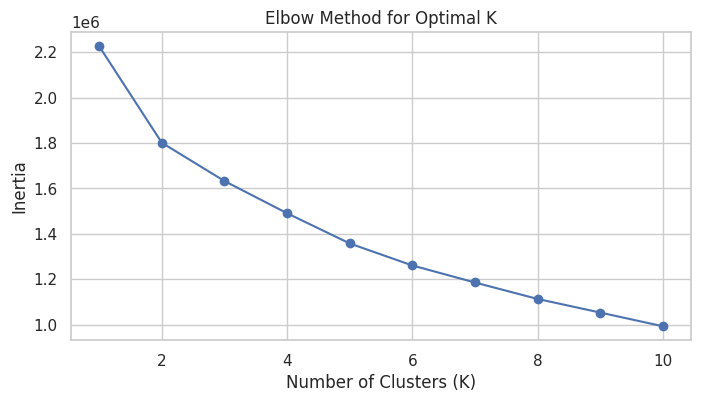

In [32]:
import matplotlib.pyplot as plt
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [33]:
# Fit the K-Means model
optimal_k = 3  # Replace with the optimal K determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
print(cluster_summary[cluster_summary['Cluster'] == 0])

NameError: name 'cluster_summary' is not defined

In [ ]:
print(cluster_summary[cluster_summary['Cluster'] == 1])

In [ ]:
print(cluster_summary[cluster_summary['Cluster'] == 2])

In [ ]:
#Figure out why poverty and ell are not included: # Check the mean values of each feature per cluster
cluster_summary = df.groupby('Cluster')[scaled_features].mean().reset_index()
print(cluster_summary)

In [35]:
cluster_summary = df.groupby('Cluster').agg({
    'fundinggap': 'mean',
    'enroll': 'mean',
    'pov': 'mean',
    'iep': 'mean',
    'ell': 'mean'
}).reset_index()

print(cluster_summary)

   Cluster   fundinggap        enroll       pov       iep       ell
0        0 -9755.816329   4663.952257  0.308002  0.160812  0.042877
1        1  2851.634533   2573.654533  0.145196  0.145581  0.020128
2        2 -4972.529574  10613.775939  0.227333  0.116077  0.206247


In [ ]:
import seaborn as sns

# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fundinggap', y='pov', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of School Districts, all years')
plt.xlabel('Funding Gap')
plt.ylabel('Percentage of Students in Poverty')
plt.show()

In [ ]:
cluster_summary = df.groupby('Cluster').agg({
    'fundinggap': 'mean',
    'amind': 'mean',
    'asian': 'mean',
    'black': 'mean',    
    'hisp': 'mean',
    'multi': 'mean',
    'pac': 'mean',
    'white': 'mean'
}).reset_index()

print(cluster_summary)

In [ ]:
import seaborn as sns

# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fundinggap', y='hisp', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of School Districts, all years')
plt.xlabel('Funding Gap')
plt.ylabel('Percentage of Hispanic Students')
plt.show()

In [36]:
# Plotting the clusters (using two features for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ppcstot'], y=df['fundinggap'], hue=df['cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Actual Spending')
plt.ylabel('Funding Gap')
plt.legend(title='Cluster')
plt.show()

KeyError: 'cluster'

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Explore this idea with Abi
# Plotting the clusters (using two features for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Race_Ethn'], y=df['fundinggap'], hue=df['cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Race_Ethn')
plt.ylabel('Funding Gap')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#Explore this idea with Abi
# Visualize Funding Gap vs. Percentage of Minority Students
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='fundinggap', label='Funding Gap', marker='o')
sns.lineplot(data=df, x='year', y='black', label='Black students', marker='s')
plt.title('Funding Gaps and Black students Over Time')
plt.ylabel('Funding Gap / Black students')
plt.xlabel('Year')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
def find_optimal_clusters(scaled_features, max_clusters=6):
    """
    Find the optimal number of clusters using the elbow method and silhouette score.
    
    Parameters:
    scaled_features (numpy.array): Scaled feature array
    max_clusters (int): Maximum number of clusters to try
    
    Returns:
    tuple: (inertias, silhouette_scores)
    """
    inertias = []
    silhouette_scores = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))
        
    return inertias, silhouette_scores

In [ ]:
def plot_clustering_metrics(inertias, silhouette_scores):
    """
    Plot the elbow curve and silhouette scores.
    
    Parameters:
    inertias (list): List of inertia values
    silhouette_scores (list): List of silhouette scores
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot elbow curve
    ax1.plot(range(2, len(inertias) + 2), inertias, marker='o')
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method')
    
    # Plot silhouette scores
    ax2.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
    ax2.set_xlabel('Number of clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def perform_clustering(scaled_features, n_clusters):
    """
    Perform K-means clustering with the specified number of clusters.
    
    Parameters:
    scaled_features (numpy.array): Scaled feature array
    n_clusters (int): Number of clusters to create
    
    Returns:
    tuple: (KMeans model, cluster labels)
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    return kmeans, labels

def analyze_clusters(df, feature_columns, labels, scaler):
    """
    Analyze the characteristics of each cluster.
    
    Parameters:
    df (pandas.DataFrame): Original dataframe
    feature_columns (list): List of feature columns used
    labels (numpy.array): Cluster labels
    scaler (StandardScaler): Fitted scaler object
    
    Returns:
    pandas.DataFrame: Cluster analysis results
    """
    # Add cluster labels to the original dataframe
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = labels
    
    # Calculate cluster means
    cluster_means = df_with_clusters.groupby('Cluster')[feature_columns].mean()
    
    # Calculate cluster sizes
    cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()
    
    return cluster_means, cluster_sizes

def plot_cluster_characteristics(cluster_means, feature_columns):
    """
    Create a heatmap of cluster characteristics.
    
    Parameters:
    cluster_means (pandas.DataFrame): Mean values for each cluster
    feature_columns (list): List of feature columns used
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_means, cmap='RdYlBu', center=0, annot=True, fmt='.2f')
    plt.title('Cluster Characteristics Heatmap')
    plt.show()

In [ ]:
# View all data points in cluster 0
cluster_0 = df[df['cluster'] == 0]
print(cluster_0)